In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
filename = 'results_evaluation_genus_50_55.csv'

df = pd.read_csv('../ResultsEvaluation/SRR/'+filename, sep='\t')
df

,Classifier,tp,fp,fn,ok,no,(tp+fp+fn+ok+no),sens,prec,f1,pearson
0,SRR1804065_1.filtr.fq_MP.V1.res,1653239,297139,3237479,50833,262293,5500983,0.315583,0.847651,0.459931,0.999754
1,SRR1804065_1.filtr.fq_MP.V2.res,1655616,299865,3231310,51212,262980,5500983,0.316078,0.846654,0.460310,0.999756
2,SRR1804065_1.filtr.fq_MPZ.V1.res,2145057,701874,2271798,61356,320898,5500983,0.414097,0.753463,0.534459,0.999896
3,SRR1804065_1.filtr.fq_MPZ.V2.res,2464825,968736,1627072,69353,370997,5500983,0.480474,0.717863,0.575655,0.999859
4,SRR1804065_1.filtr.fq_MT.V1.res,1582985,247266,3390263,26465,254004,5500983,0.301695,0.864900,0.447346,0.999704
5,SRR1804065_1.filtr.fq_MT.V2.res,1566334,263926,3390357,26909,253457,5500983,0.298490,0.855799,0.442606,0.999687
6,SRR1804065_1.filtr.fq_MTZ.V1.res,2182268,683428,2271798,42591,320898,5500983,0.421280,0.761514,0.542463,0.999895
7,SRR1804065_1.filtr.fq_MTZ.V2.res,2482848,967145,1627072,52921,370997,5500983,0.483987,0.719668,0.578754,0.999855
8,strex_centrifuge_SRR1804065.res,1607075,342440,3249654,60875,240939,5500983,0.305525,0.824346,0.445818,0.999735
9,strex_centrifuge_SRR180406_SP.res,1669862,360632,3162845,62637,245007,5500983,0.317707,0.822392,0.458346,0.999777


In [134]:
def ReacllPlot(df):
    
    classificators = ['centrifuge','clark_genus','k2','kraken1']
    fig, ax = plt.subplots(figsize=(20,10))
    
    ## centrifuge
    new_df = df[df["Classifier"].str.contains(classificators[0])]

    y = new_df['sens']
    x = np.arange(len(classificators))  # the label locations
    width = 0.50  # the width of the bars
    

    y=[]
    y_sp = []
    y_spz = []
    y_st = []
    y_stz = []
    
    for name in classificators:
        new_df = df[df["Classifier"].str.contains(name)]
    
        label = []
        for i in range (0,5):
            if 'SPZ' in new_df['Classifier'].values[i]:
                label.append('SPZ')
                y_spz.append(new_df['sens'].values[i])
            elif 'SP' in new_df['Classifier'].values[i]:
                label.append('SP')
                y_sp.append(new_df['sens'].values[i])

            elif 'STZ' in new_df['Classifier'].values[i]:
                label.append('STZ')
                y_stz.append(new_df['sens'].values[i])
            elif 'ST' in new_df['Classifier'].values[i]:
                label.append('ST')
                y_st.append(new_df['sens'].values[i])
            else:
                label.append(name)
                y.append(new_df['sens'].values[i])
    
      ##colors
    #C1CF79   verde 
    #C57673   marroncino
    #B375CC   viola
    #7797CD   blue
    #87CE9B   verde acceso
    
    plt.bar(x - 2.25*width/5, y, width/5, label='Initial classification', color='#C1CF79')
    plt.bar(x - 1.25*width/5, y_sp, width/5, label='Single Partial', color='#C57673')
    plt.bar(x - 0.25*width/5, y_spz, width/5, label='Single Partial Zero', color='#B375CC')
    plt.bar(x + 0.75*width/5, y_st, width/5, label='Single Total', color='#7797CD')
    plt.bar(x + 1.75*width/5, y_stz, width/5, label='Single Total Zero', color='#87CE9B')

     # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('Recall')
    # plt.title('Scores by group and gender')
    plt.xticks(x)
    ax.set_xticklabels(classificators)
    plt.legend(loc='upper center')
    plt.grid(True)

    plt.savefig('recall-only-genus')
    plt.show()
    

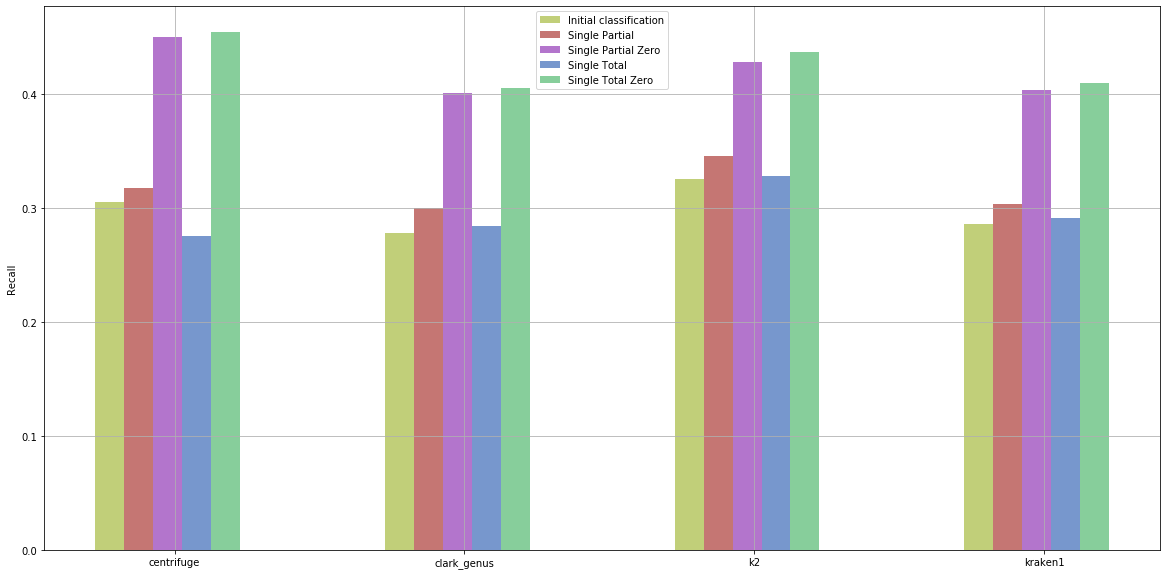

In [135]:
ReacllPlot(df)